In [6]:
%config IPCompleter.greedy = True

In [22]:
from tensorflow import keras
import tensorflow as tf

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(train_images,train_tags),(test_images,test_tags) = fashion_mnist.load_data()

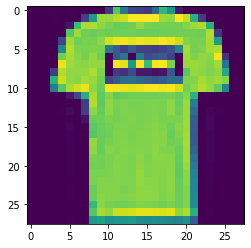

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1])

In [16]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

In [15]:
set(train_tags)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [18]:
model.summary()
# 100480=((784+1) * 128) 每个神经元有个bias   
# 1290=((128+1) * 10) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [33]:
train_images = train_images / 255
model.fit(train_images,train_tags,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 751us/step - loss: 1.4807 - accuracy: 0.5594
Epoch 2/5
1875/1875 [==============================] - 1s 747us/step - loss: 0.6507 - accuracy: 0.7663
Epoch 3/5
1875/1875 [==============================] - 1s 743us/step - loss: 0.5652 - accuracy: 0.7979
Epoch 4/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.5155 - accuracy: 0.8148
Epoch 5/5
1875/1875 [==============================] - 1s 746us/step - loss: 0.4898 - accuracy: 0.8259


In [34]:
test_images= test_images/255

In [35]:
model.evaluate(test_images,test_tags)

313/313 [==============================] - 0s 571us/step - loss: 101.5083 - accuracy: 0.6820


[101.50826263427734, 0.6819999814033508]

In [49]:
import numpy as np
print(np.argmax(model.predict(test_images[0].reshape(1,784))))

9


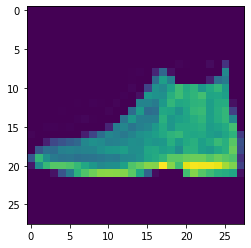

In [50]:
plt.imshow(test_images[0])

In [54]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get("loss") < 0.45):
            print("提前终止训练")
            self.model.stop_training = "True"

In [55]:
callback = myCallBack()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_images,train_tags,epochs=5,callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 2s 751us/step - loss: 0.4220 - accuracy: 0.8517
提前终止训练
